In [1]:
import requests
import pandas as pd

In [10]:
def get_historic_price(symbol, after='2018-09-01'):
    
    url = 'https://api.kraken.com/0/public/OHLC'
    pair = f"{symbol.upper()}USD" # XBTUSD when symbol='xbt' for example
    
    resp = requests.get(url, params={
        "pair": pair,
        'interval': 60,
        'since': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    
    data = resp.json()
    
    results_key = [k for k in data['result'].keys() if k != 'last'][0]
    results = [
        (close_time, float(open), float(high), float(low), float(close), float(volume))
        for (close_time, open, high, low, close, vwap, volume, count)
        in data['result'][results_key]
    ]
    df = pd.DataFrame(results, columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [11]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2025-07-15 00:06:29.720001')

In [12]:

btc = get_historic_price('btc', after=last_week)

In [5]:

eth = get_historic_price('eth', after=last_week)

In [13]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2025-07-15 01:00:00,119562.6,119562.6,118469.0,118500.1,101.915421
2025-07-15 02:00:00,118500.2,118824.9,117855.2,118265.8,90.363639
2025-07-15 03:00:00,118265.8,118265.8,116847.3,117200.1,179.312058
2025-07-15 04:00:00,117200.1,117514.2,116282.0,117499.8,215.124307
2025-07-15 05:00:00,117499.9,117755.2,117037.8,117375.8,79.319488


In [14]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 163 entries, 2025-07-15 01:00:00 to 2025-07-21 19:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   163 non-null    float64
 1   HighPrice   163 non-null    float64
 2   LowPrice    163 non-null    float64
 3   ClosePrice  163 non-null    float64
 4   Volume      163 non-null    float64
dtypes: float64(5)
memory usage: 7.6 KB


<Axes: xlabel='CloseTime'>

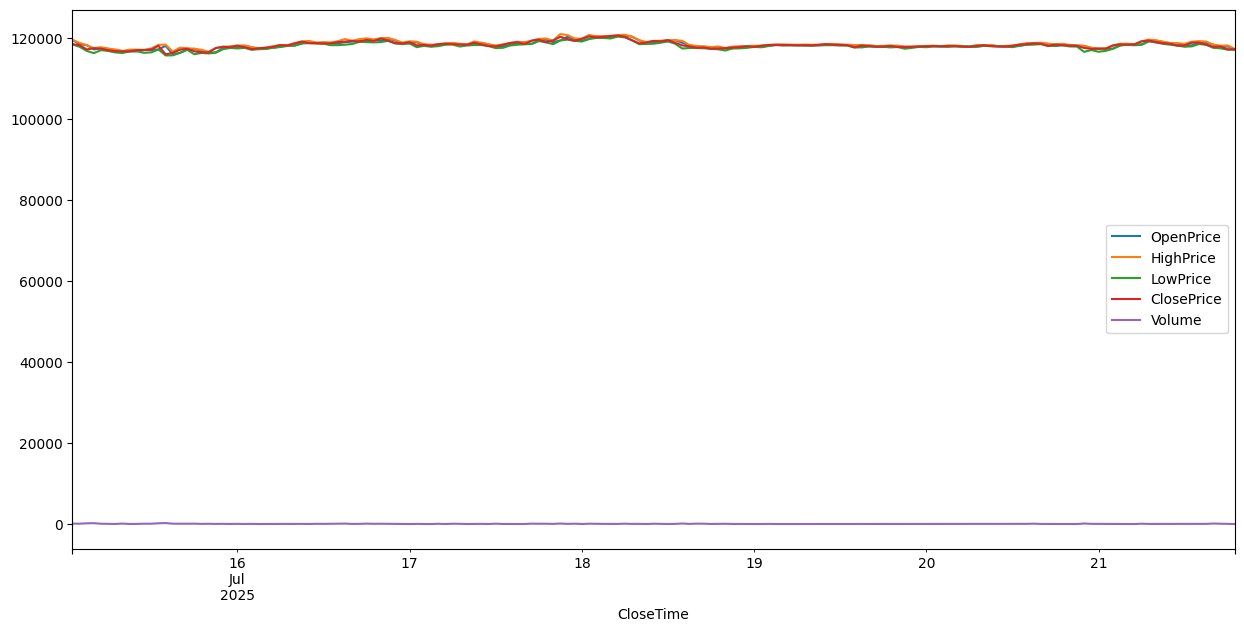

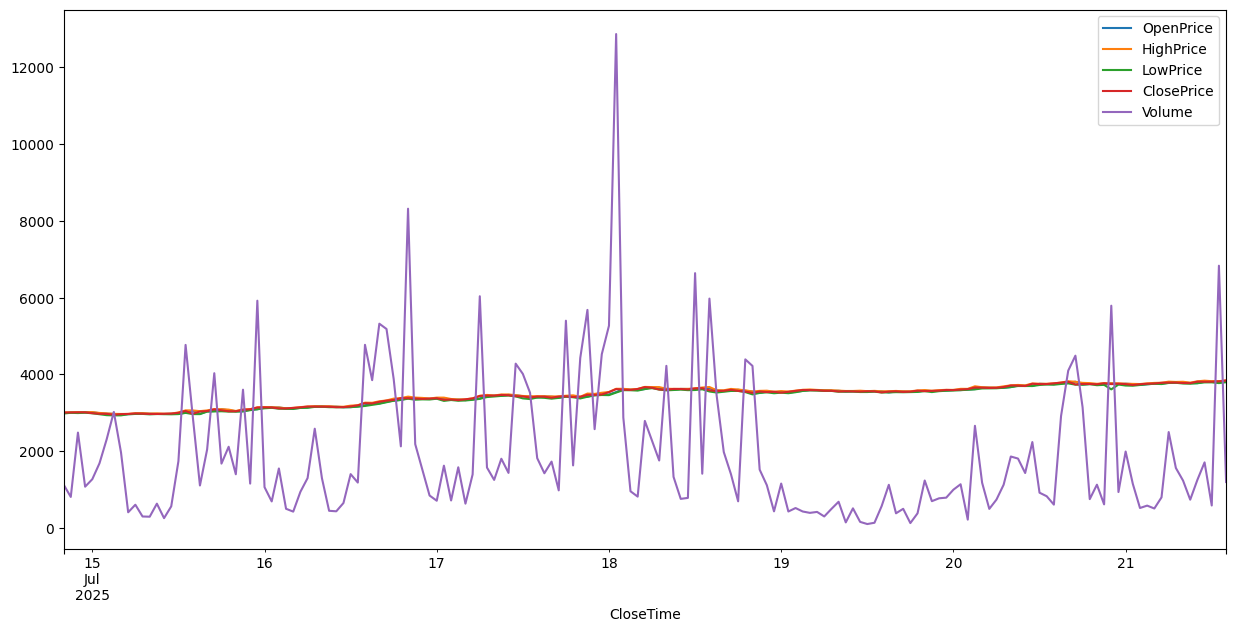

In [ ]:
btc.plot(figsize=(15,7))

<Axes: xlabel='CloseTime'>

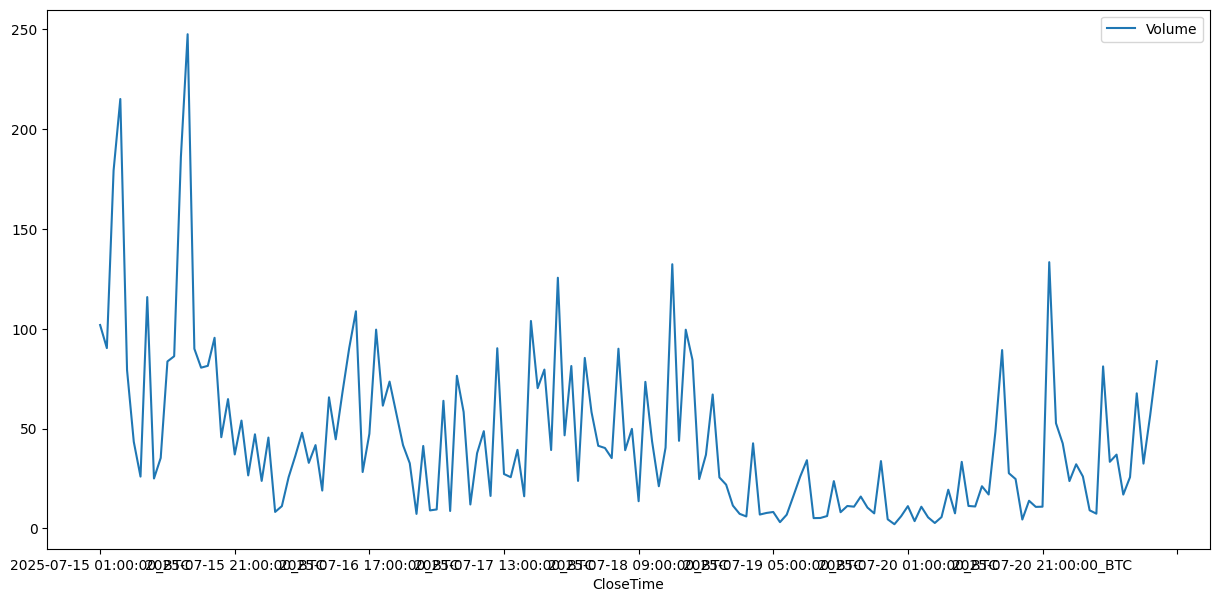

In [ ]:
# Make sure they align on the same index first!
common_index = btc.index.intersection(eth.index)
btc_aligned = btc.loc[common_index]
eth_aligned = eth.loc[common_index]

# Add suffixes so columns don’t clash
combined = pd.concat(
    [btc_aligned['Volume'].add_suffix('_BTC'), eth_aligned['Volume'].add_suffix('_ETH')],
    axis=1
)

# Now you have ONE DataFrame: combined
combined.plot(figsize=(15, 7))